Notebook for visualizing model selection curves stored in pickle files

In [3]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import pickle
import numpy as np
import os

In [4]:
sns.set_style("ticks")
sns.set_palette("Set2")
matplotlib.rcParams.update({'font.size': 20})

In [11]:
model_pths = [
    './data/model_selection/32/modular/modular_v3-full-base.pkl',
    './data/model_selection/32/parities/parities_v3-full-base.pkl',
    './data/model_selection/32/modular_ln/--base.pkl',
    './data/model_selection/32/cifar100_v3/False_False/--base.pkl',
    './data/model_selection/32/cifar100_v3/True_True/--base.pkl',
    './data/model_selection/32/mnist_v2--base.pkl',
    './data/model_selection/32/multiberts/multiberts_diag.pkl',
]

In [12]:
def plot(data):
    fig, ax1 = plt.subplots(figsize=(8, 4))
    palette = sns.color_palette("Set2")
    N = len(data['mean_scores'])
    x = np.arange(1, N+1)
    mean_scores = np.array(data['mean_scores'])
    std_scores = np.array(data['scores_stdev'])
    aics = np.array(data['aics'])
    bics = np.array(data['bics'])

    sns.lineplot(ax=ax1, x=x, y=data['mean_scores'], label='Log density', color=palette[0])
    ax1.fill_between(x, mean_scores - std_scores, mean_scores + std_scores, color='gray', alpha=0.2, label='Error band')

    ax2 = ax1.twinx()

    sns.lineplot(ax=ax2, x=x, y=aics, label='AIC', color=palette[1], linewidth=2)
    sns.lineplot(ax=ax2, x=x, y=bics, label='BIC', color=palette[2], linewidth=2)

    handles1, labels1 = ax1.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()
    handles = handles1 + handles2
    labels = labels1 + labels2

    ax1.set_xlabel("Number of components")
    ax1.set_ylabel("Log density")
    ax2.set_ylabel("AIC/BIC")

    ax1.legend().remove()
    ax2.legend().remove()

    ax1.legend(handles, labels)
    return fig, ax1, ax2

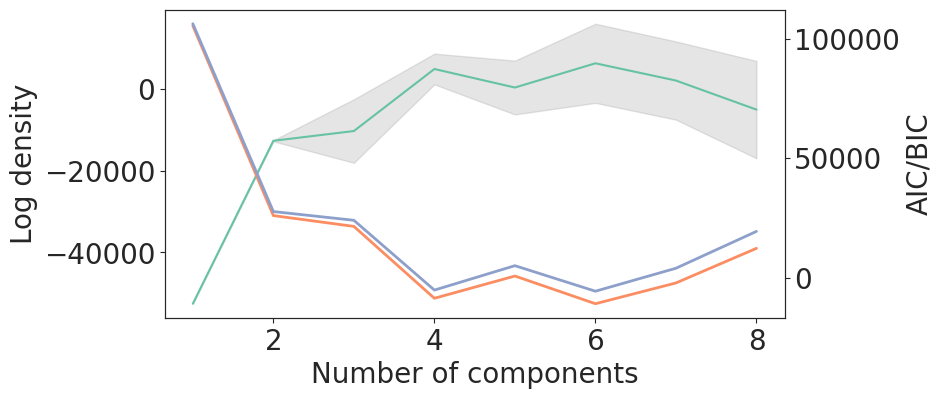

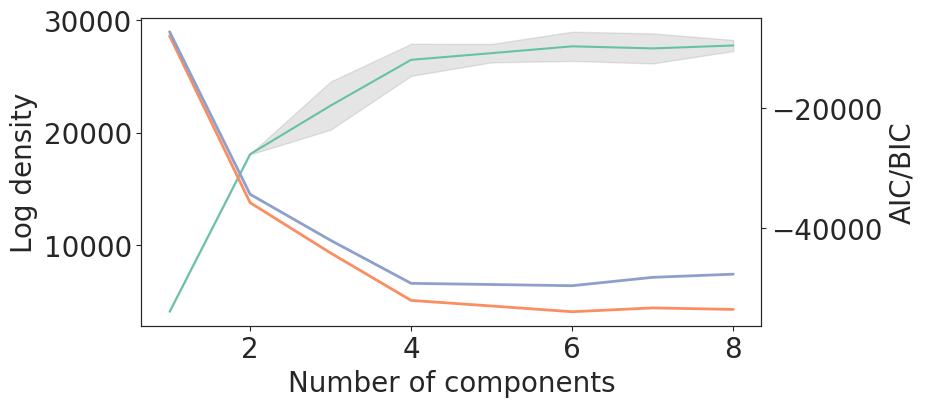

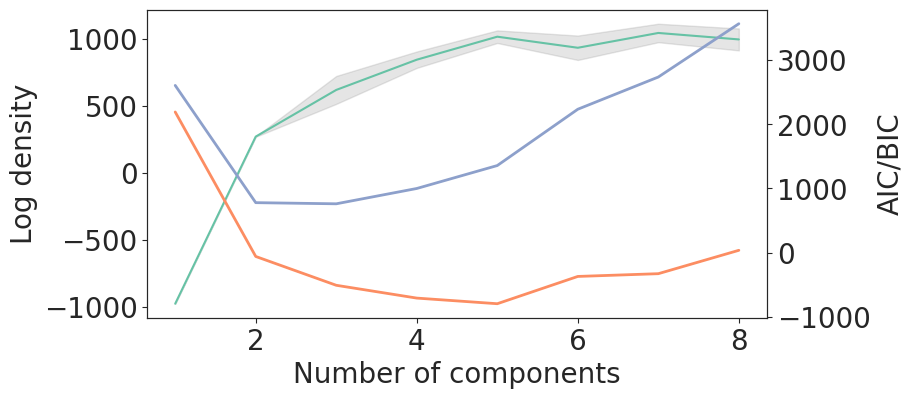

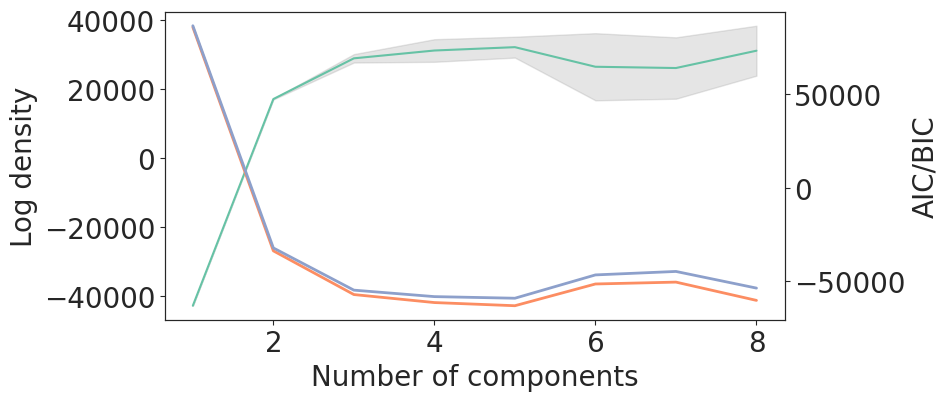

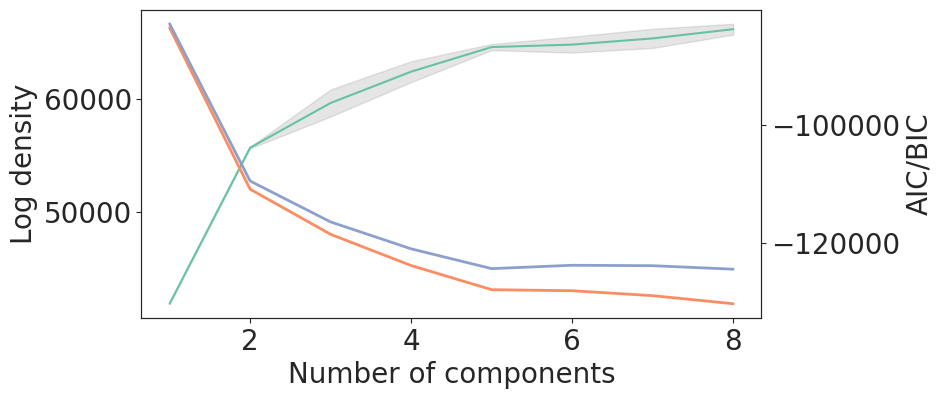

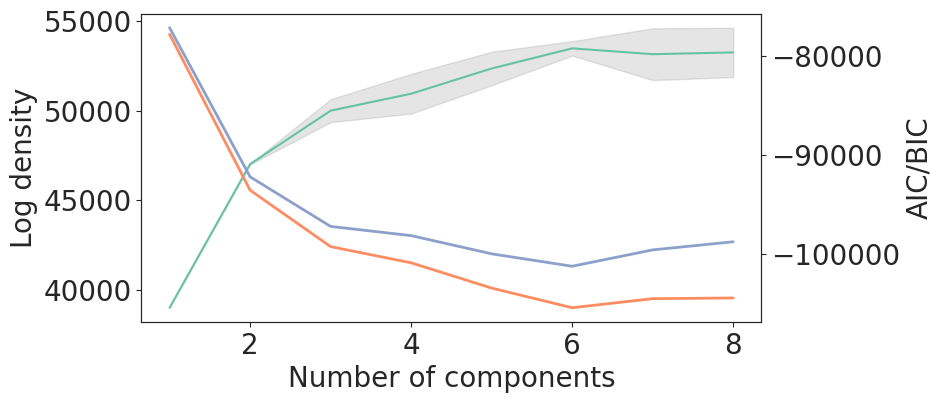

In [13]:
for i, pth in enumerate(model_pths):
    file_name = os.path.splitext(os.path.basename(pth))[0]
    
    with open(pth, 'rb') as f:
        data = pickle.load(f)
        
    fig, ax1, ax2 = plot(data)
    # if i != 0:
    ax1.legend().remove()
        
    fig.savefig(f"./figures/model_selection/{i}_{file_name}", dpi=300, bbox_inches='tight')